In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing as skpr
import math
import os
from glob import glob
import scipy.misc
%matplotlib inline

In [7]:


# Read train dataset
train_df = pd.read_csv('data/UCR_TS_Archive_2015/StarLightCurves/StarLightCurves_TRAIN', header=None)

# Read test dataset
test_df = pd.read_csv('data/UCR_TS_Archive_2015/StarLightCurves/StarLightCurves_TEST', header=None)
train_df.shape

(1000, 1025)

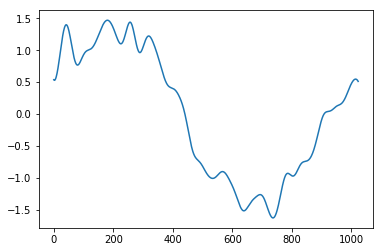

In [9]:
target, *serie = train_df.iloc[0]
plt.plot(serie)
plt.show()

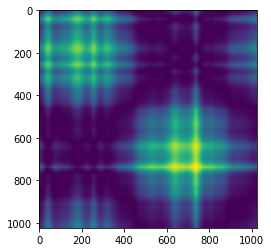

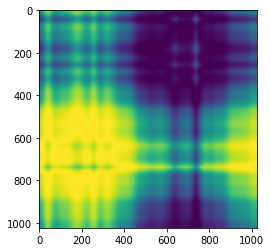

In [8]:
#for i in range(len(train_df.index)):
target, *serie = train_df.iloc[0]
new_x = skpr.maxabs_scale(serie)
theta = np.arccos(new_x)

GAFS = np.array([ np.cos(tet+theta) for tet in theta ])    

GAFD = np.array([ np.sin(tet-theta) for tet in theta ])    

plt.imshow(GAFS)
plt.show()
plt.imshow(GAFD)
plt.show()
    

In [4]:
target, *serie = train_df.iloc[0]
new_x = skpr.maxabs_scale(serie)

q = pd.qcut(new_x, 64)
q.codes


array([23, 21, 11,  7,  4,  3,  5,  7,  8, 12, 13, 16, 42, 57, 62, 63, 63,
       60, 49, 14,  6, 12, 32, 45, 23,  5,  1,  0,  2, 24, 59, 63, 62, 60,
       56, 51, 46, 35, 15,  4,  1,  2,  9, 47, 55, 50, 18,  3,  0,  0,  6,
       46, 57, 59, 58, 61, 61, 58, 39,  8, 10, 25, 48, 52, 55, 53, 35, 20,
       11, 40, 51, 48, 42, 27, 19, 25, 29, 33, 41, 31, 24, 28, 27, 26, 18,
       19, 38, 50, 54, 52, 44, 30, 30, 36, 40, 37, 38, 49, 54, 56, 53, 44,
       26, 16, 17, 32, 37, 34, 39, 43, 47, 43, 20,  9, 17, 33, 45, 41, 28,
       13, 10, 14, 22, 31, 31, 21, 15, 29, 34, 36, 22], dtype=int8)

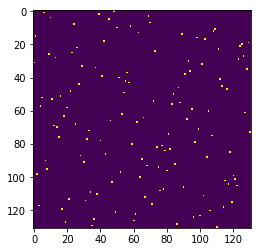

131 131
[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


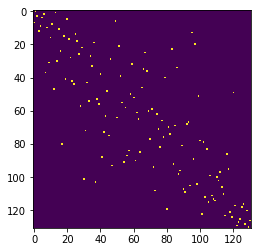

In [11]:
Q = 131

# Get quantiles from serie
q = pd.qcut(list(set(serie)), Q)
# Create a dict of series and quantiles
serie_quantil_dict = dict(zip(set(serie), q.codes))

# Create empty matrix size of quantiles
MTF = np.zeros([Q,Q])

# Get all values from dictionary
labels = list(serie_quantil_dict.values())

# Iterate on all labels,
for i in range(len(labels)-1):
    MTF [labels[i]] [labels[i+1]] += 1
    
# Scale from 0 to 1
for i in range(Q):
    if sum(MTF[i][:]) == 0:
        continue        
    MTF[i][:] = MTF[i][:]/sum(MTF[i][:])

    
plt.imshow(np.array(MTF))
plt.show()






print(len(list(set(new_x))), len(new_x))
q = pd.qcut(list(set(new_x)), Q)
dic = dict(zip(set(new_x), q.codes))
MSM = np.zeros([Q,Q])
label = []

for each in new_x:
    label.append(dic[each])

for i in range(0, len(label)-1):
    MSM[label[i]][label[i+1]] += 1


for i in range(Q):
    if sum(MSM[i][:]) == 0:
        continue
    MSM[i][:] = MSM[i][:]/sum(MSM[i][:])

np.array(MSM), label, q.codes

print(MSM)

plt.imshow(np.array(MSM))
plt.show()

In [45]:
# Count number of classes for each time series
word_dict = {}
for data in train_df[0]:
    x = word_dict.get(data, 0)
    word_dict[data] = x + 1

len(word_dict)

14

In [7]:
# Gramian Angular Field
def get_GAF(row):
    # Scale values to [-1,1]
    new_x = skpr.maxabs_scale(row)
    
    # Transform to theta and r coordinates
    theta = np.arccos(new_x)
    r = 0 # not important
    
    # Convert to GAF image
    GAF = np.array([ np.cos(theta+tet) for tet in theta ])
    return GAF

# Markow Transition Field
def get_MTF(row):
    pass
     

In [5]:
# Create iamge dataset
for item in target_list:
    if not os.path.isdir('images/train/%s' % item):
        os.mkdir('images/train/%s' % item)
    if not os.path.isdir('images/val/%s' % item):
        os.mkdir('images/val/%s' % item)

# Transform train dataset to images
for i in range(len(train_df.index)):
    target, *serie = train_df.iloc[i]
    # create GAF image
    GAF = get_GAF(serie)
    scipy.misc.toimage(GAF, cmin=-1, cmax=1).save('images/train/%s/%s.jpg' % (int(target), i))
    
# Transform test dataset to images
for i in range(len(test_df.index)):
    target, *serie = test_df.iloc[i]
    # create GAF image
    GAF = get_GAF(serie)
    scipy.misc.toimage(GAF, cmin=-1, cmax=1).save('images/val/%s/%s.jpg' % (int(target), i))


### Build HDF5 Image Dataset

In [8]:
from __future__ import division, print_function, absolute_import

import tflearn
import tensorflow as tf
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

In [7]:
from tflearn.data_utils import build_hdf5_image_dataset

# Create train dataset for tflearn
build_hdf5_image_dataset('images/train/', image_shape=(131,131), 
                         mode='folder', output_path='train.h5',
                         categorical_labels=True)

# Create val dataset for tflearn
build_hdf5_image_dataset('images/val/', image_shape=(131,131),
                         mode='folder', output_path='val.h5',
                         categorical_labels=True)

In [4]:
# Load dataset to use in network
import h5py
h5f_train = h5py.File('train.h5', 'r')
h5f_val = h5py.File('val.h5', 'r')

train_x = h5f_train['X']
train_y = h5f_train['Y']
x_test = h5f_val['X']
y_test = h5f_val['Y']

In [9]:
len(y[0])

14

## CNN for Time Series, FINETUNING

In [11]:
# Building 'AlexNet'
network = tflearn.input_data(shape=[None, 131, 131, 3])
network = tflearn.conv_2d(network, 96, 11, strides=4, activation='relu')
network = tflearn.max_pool_2d(network, 3, strides=2)
network = tflearn.local_response_normalization(network)
network = tflearn.conv_2d(network, 256, 5, activation='relu')
network = tflearn.max_pool_2d(network, 3, strides=2)
network = tflearn.local_response_normalization(network)
network = tflearn.conv_2d(network, 384, 3, activation='relu')
network = tflearn.conv_2d(network, 384, 3, activation='relu')
network = tflearn.conv_2d(network, 256, 3, activation='relu')
network = tflearn.max_pool_2d(network, 3, strides=2)
network = tflearn.local_response_normalization(network)
network = tflearn.fully_connected(network, 4096, activation='tanh')
network = tflearn.dropout(network, 0.5)
network = tflearn.fully_connected(network, 4096, activation='tanh')
network = tflearn.dropout(network, 0.5)
network = tflearn.fully_connected(network, 14, activation='softmax')
network = tflearn.regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.01)

# Training
model = tflearn.DNN(network, checkpoint_path='model_alexnet',
                    max_checkpoints=1, tensorboard_verbose=2)


In [12]:
model.fit(train_x, train_y, validation_set=(x_test, y_test), n_epoch=200, shuffle=True,
          show_metric=True, batch_size=96, snapshot_step=200,
snapshot_epoch=False, run_id='cnn_time_series')

IndexError: list index out of range

## Training without Finetuning

In [6]:
model.fit(train_x, train_y, n_epoch=50, validation_set=(x_test, y_test), show_metric=True, shuffle=True, batch_size=96)

Training Step: 125  | total loss: 2.63950 | time: 2.448s
| Adam | epoch: 021 | loss: 2.63950 - acc: 0.0659 -- iter: 480/560


KeyboardInterrupt: 

## LSTM with normal Time Series

In [4]:
train_x = train_df.drop(train_df.columns[[0]], axis=1).values.tolist()
train_x = np.reshape(train_x, (-1,1,131))
print(train_x.shape)
train_y = to_categorical([y-1 for y in train_df[0].values.tolist()], 14)

test_x = test_df.drop(test_df.columns[[0]], axis=1).values.tolist()
test_x = np.reshape(test_x, (-1,1,131))
print(test_x.shape)
test_y = to_categorical([y-1 for y in test_df[0].values.tolist()], 14)

len(train_x[0])

(560, 1, 131)
(1690, 1, 131)


1

In [5]:
# Network
net = tflearn.input_data([None, 1, 131])
net = tflearn.lstm(net, 256, dropout=0.8)
net = tflearn.fully_connected(net, 14, activation='softmax')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,
                        loss='categorical_crossentropy')

# Training
model = tflearn.DNN(net, tensorboard_verbose=0)

In [7]:
model.fit(train_x, train_y, n_epoch=200, validation_set=(test_x, test_y), show_metric=True)

Training Step: 1889  | total loss: 0.63728 | time: 0.047s
| Adam | epoch: 210 | loss: 0.63728 - acc: 0.9072 -- iter: 512/560
Training Step: 1890  | total loss: 0.58137 | time: 1.055s
| Adam | epoch: 210 | loss: 0.58137 - acc: 0.9164 | val_loss: 0.70696 - val_acc: 0.7846 -- iter: 560/560
--
